In [ ]:
# Take data_updated and randomly select 5000 rows.
# Only keep the hashtag and like columns. Shape it the same as synthetic_instagram_data to be used in the rest of the code
file_path = 'data_updated.csv'
data = pd.read_csv(file_path)
data = data.sample(n=1000)
data= data[['hashtags', 'nb_likes']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


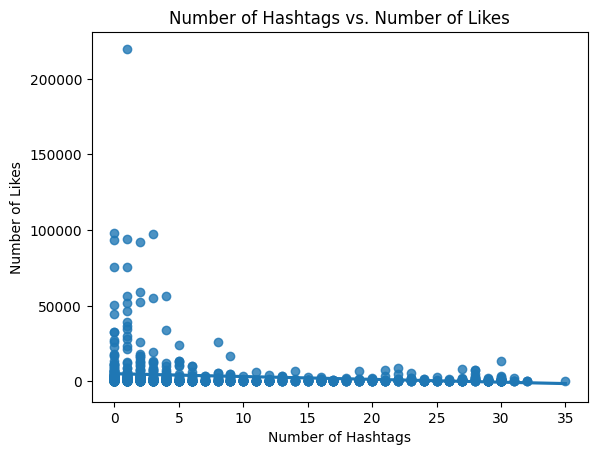

              num_hashtags  nb_likes
num_hashtags      1.000000 -0.157843
nb_likes         -0.157843  1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données générées
data['hashtags'] = data['hashtags'].apply(lambda x: eval(x))

# Calculer le nombre de hashtags par post
data['num_hashtags'] = data['hashtags'].apply(len)

# Calculer la corrélation
correlation = data[['num_hashtags', 'nb_likes']].corr()

# Tracer le scatter plot
sns.regplot(x='num_hashtags', y='nb_likes', data=data)
plt.title('Number of Hashtags vs. Number of Likes')
plt.xlabel('Number of Hashtags')
plt.ylabel('Number of Likes')
plt.savefig('hashtag_likes.png')
plt.show()
print(correlation)


In [ ]:
print(correlation)

              num_hashtags  nb_likes
num_hashtags      1.000000 -0.157843
nb_likes         -0.157843  1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Transformer les hashtags en chaîne de caractères
data['hashtags_str'] = data['hashtags'].apply(lambda x: ' '.join(x))

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['hashtags_str'])

# Utiliser la méthode du coude pour déterminer le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Tracer le graphique du coude
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_method.png')
plt.show()

# Ajuster le KMeans avec le nombre optimal de clusters
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['cluster'] = kmeans.fit_predict(X)

# Calculer la moyenne des likes par cluster
cluster_analysis = data.groupby('cluster')['nb_likes'].mean()

print("Average number of likes per cluster:")
print(cluster_analysis)


NameError: name 'data' is not defined

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Encoder les transactions de hashtags
te = TransactionEncoder()
te_ary = te.fit(data['hashtags']).transform(data['hashtags'])
df = pd.DataFrame(te_ary, columns=te.columns_)

# Appliquer l'algorithme Apriori pour trouver les itemsets fréquents
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Générer les règles d'association
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filtrer les règles basées sur lift et confiance
filtered_rules = rules[(rules['lift'] >= 2) & (rules['confidence'] >= 0.5)]
filtered_rules.sort_values(by='lift', ascending=False, inplace=True)

print("Top association rules:")
print(filtered_rules.head())


Top association rules:
                  antecedents       consequents  antecedent support  \
32            (ootd, fashion)  (fashionblogger)               0.015   
30     (fashionblogger, ootd)         (fashion)               0.022   
29                   (outfit)            (ootd)               0.015   
31  (fashionblogger, fashion)            (ootd)               0.017   
1              (LTKsalealert)        (liketkit)               0.010   

    consequent support  support  confidence       lift  leverage  conviction  \
32               0.044    0.011    0.733333  16.666667  0.010340      3.5850   
30               0.038    0.011    0.500000  13.157895  0.010164      1.9240   
29               0.055    0.010    0.666667  12.121212  0.009175      2.8350   
31               0.055    0.011    0.647059  11.764706  0.010065      2.6775   
1                0.094    0.010    1.000000  10.638298  0.009060         inf   

    zhangs_metric  
32       0.954315  
30       0.944785  
29       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-34-6ceb1dfa953a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rules.sort_values(by='lift', ascending=False, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Mean Squared Error: 143074006.664359


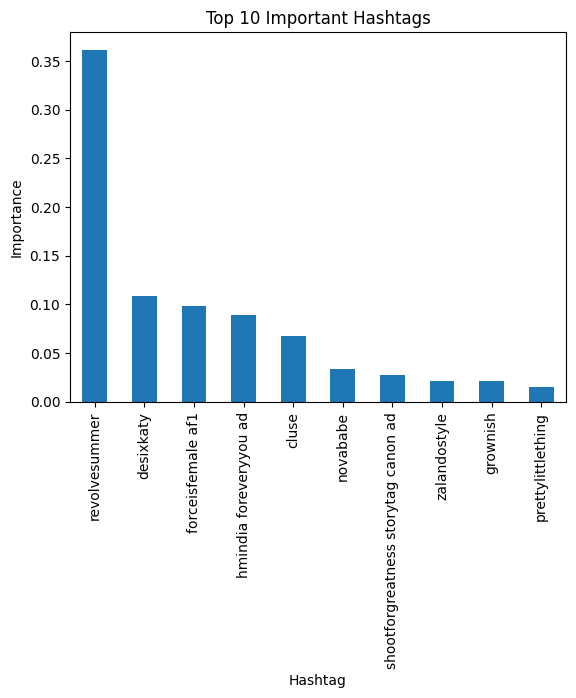

Predicted likes for hashtags ['#love', '#instagood', '#fashion']: 43.75


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Vectoriser les hashtags en compte de token
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
X = vectorizer.fit_transform(data['hashtags_str'])

# Convertir en DataFrame
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Variable cible
y = data['nb_likes']

# Diviser les données en sets d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Initialiser le modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire sur le set de test
y_pred = model.predict(X_test)

# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Importance des caractéristiques
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=vectorizer.get_feature_names_out()).sort_values(ascending=False)

# Tracer l'importance des caractéristiques
feature_importance.head(10).plot(kind='bar')
plt.title('Top 10 Important Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Importance')
plt.savefig('feature_importance.png')
plt.show()

# Fonction pour prédire les likes basés sur de nouveaux hashtags
def predict_likes(hashtags):
    hashtags_str = ', '.join(hashtags)
    hashtags_vectorized = vectorizer.transform([hashtags_str])
    prediction = model.predict(hashtags_vectorized)
    return prediction[0]

# Exemple d'utilisation
example_hashtags = ['#love', '#instagood', '#fashion']
predicted_likes = predict_likes(example_hashtags)
print(f'Predicted likes for hashtags {example_hashtags}: {predicted_likes}')
